In [1]:
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np

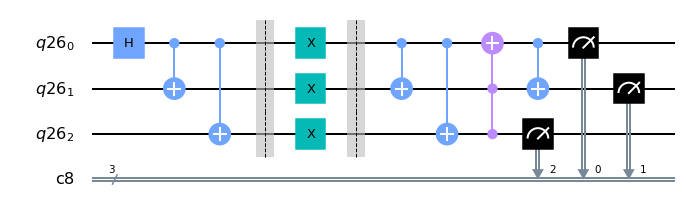

In [13]:
# The problem as described in the Screening Task Sheet
#Initialization
qb = QuantumRegister(3)
cb = ClassicalRegister(3)
mycircuit = QuantumCircuit(qb,cb)
#Applying Gates
mycircuit.h(0)
mycircuit.cnot(0,1)
mycircuit.cnot(0,2)
mycircuit.barrier()

#Noisy Channel#
#Taking noise which results in a bit flip
mycircuit.x(qb)
mycircuit.barrier()
#Noisy Channel#


mycircuit.cnot(0,1)
mycircuit.cnot(0,2)
mycircuit.ccx(1,2,0)
mycircuit.cnot(0,1)
#Measurement
mycircuit.measure(qb,cb)
mycircuit.draw("mpl")

In [14]:
#Defining Backend and seeing the statistics
backend = BasicAer.get_backend('qasm_simulator')
job = execute(mycircuit, backend, shots=1000)
job.result().get_counts(mycircuit)

{'000': 494, '011': 506}

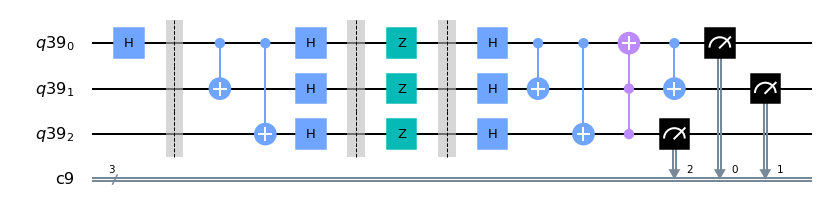

In [16]:
#Initialization
qb = QuantumRegister(3)
cb = ClassicalRegister(3)
mycircuit = QuantumCircuit(qb,cb)

#Applying Gates
mycircuit.h(0)
mycircuit.barrier()

#Encoding
mycircuit.cnot(0,1)
mycircuit.cnot(0,2)
mycircuit.h(qb)
mycircuit.barrier()

#Noisy Channel#
mycircuit.z(qb)
mycircuit.barrier()
#Noisy Channel#

#Decoding
mycircuit.h(qb)
mycircuit.cnot(0,1)
mycircuit.cnot(0,2)
mycircuit.ccx(1,2,0)
mycircuit.cnot(0,1)

#Measurement
mycircuit.measure(qb,cb)
mycircuit.draw("mpl")

In [17]:
#Defining Backend and getting stats
backend = BasicAer.get_backend('qasm_simulator')
job = execute(mycircuit, backend, shots=1000)
job.result().get_counts(mycircuit)

{'000': 504, '011': 496}

I was not sure whether we can implement the error correction after the bell state is made or just after the first H gate implementation.So, I made two different attempts to solve the task. Primarily if we apply the Phase flip correction code we can also see that bit flip correction code gets applied too. Also, Phase flip and Bit flip correction circuits when used together can result in the correct solution of the problem faced. 